## Project- Survey StackFlow

In [6]:
import pandas as pd

df = pd.read_csv('developer_dataset.csv')

print(df.columns)

Index(['RespondentID', 'Year', 'Country', 'Employment', 'UndergradMajor',
       'DevType', 'LanguageWorkedWith', 'LanguageDesireNextYear',
       'DatabaseWorkedWith', 'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'Hobbyist', 'OrgSize', 'YearsCodePro',
       'JobSeek', 'ConvertedComp', 'WorkWeekHrs', 'NEWJobHunt',
       'NEWJobHuntResearch', 'NEWLearn'],
      dtype='object')


/Users/luizotaviofariavitor/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (18,19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Now, we will analyze through an overview. Since this is a survey we should expect have blank spaces and are optional. We will use the method count()

In [12]:
df.count() 

RespondentID              111209
Year                      111209
Country                   111209
Employment                109425
UndergradMajor             98453
DevType                   100433
LanguageWorkedWith        102018
LanguageDesireNextYear     96044
DatabaseWorkedWith         85859
DatabaseDesireNextYear     74234
PlatformWorkedWith         91609
PlatformDesireNextYear     85376
Hobbyist                   68352
OrgSize                    54804
YearsCodePro               94793
JobSeek                    60556
ConvertedComp              91333
WorkWeekHrs                51089
NEWJobHunt                 19127
NEWJobHuntResearch         18683
NEWLearn                   24226
dtype: int64

Let's have a better statistical understanding of the data. Through describe m

In [16]:
df.describe()

,RespondentID,Year,YearsCodePro,ConvertedComp,WorkWeekHrs
count,111209.000000,111209.000000,94793.000000,9.133300e+04,51089.000000
mean,19262.039709,2018.854832,9.547045,1.251777e+05,41.051670
std,11767.011322,0.777503,7.548931,2.461218e+05,13.833929
min,1.000000,2018.000000,0.000000,0.000000e+00,1.000000
25%,9268.000000,2018.000000,4.000000,4.600000e+04,40.000000
50%,18535.000000,2019.000000,8.000000,7.900000e+04,40.000000
75%,28347.000000,2019.000000,14.000000,1.200000e+05,42.000000
max,42857.000000,2020.000000,50.000000,2.000000e+06,475.000000


Now, we want to see how much missing data we have, following select the columns who had more or equal 60% of missing data

In [30]:
maxrow = df['RespondentID'].count() # We will count how many rows RespondentID has, since anyone that has filled
                                    #a survey has an ID, eventhough they had not filled all the survey

print('%Missing Data:')
print((1-df.count()/maxrow) *100)

%Missing Data:
RespondentID               0.000000
Year                       0.000000
Country                    0.000000
Employment                 1.604187
UndergradMajor            11.470295
DevType                    9.689863
LanguageWorkedWith         8.264619
LanguageDesireNextYear    13.636486
DatabaseWorkedWith        22.794918
DatabaseDesireNextYear    33.248208
PlatformWorkedWith        17.624473
PlatformDesireNextYear    23.229235
Hobbyist                  38.537349
OrgSize                   50.719816
YearsCodePro              14.761395
JobSeek                   45.547573
ConvertedComp             17.872654
WorkWeekHrs               54.060373
NEWJobHunt                82.800852
NEWJobHuntResearch        83.200101
NEWLearn                  78.215792
dtype: float64


Based on those percentages, it's safe to remove the follwing columns:

NEWJobHunt                82.800852

NEWJobHuntResearch        83.200101

NEWLearn                  78.215792

We will utilize the pandas method .drop([columns], axis=1, inplace =True)

In [42]:
df.drop(['NEWJobHunt','NEWJobHuntResearch','NEWLearn'],
    axis=1,
    inplace=True)

KeyError: "['NEWJobHunt' 'NEWJobHuntResearch' 'NEWLearn'] not found in axis"

In [45]:
print(df.count())

RespondentID              111209
Year                      111209
Country                   111209
Employment                109425
UndergradMajor             98453
DevType                   100433
LanguageWorkedWith        102018
LanguageDesireNextYear     96044
DatabaseWorkedWith         85859
DatabaseDesireNextYear     74234
PlatformWorkedWith         91609
PlatformDesireNextYear     85376
Hobbyist                   68352
OrgSize                    54804
YearsCodePro               94793
JobSeek                    60556
ConvertedComp              91333
WorkWeekHrs                51089
dtype: int64


#### Analyze Developers By Country

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

df[['RespondentID', 'Country']].groupby('Country').count()

,RespondentID
Country,
Canada,8979
China,2072
France,6861
Germany,16215
Japan,1049
Mexico,1918
Spain,4534
United Kingdom,15854
United States,53727


In [11]:
missingData = df[['Employment', 'DevType']].isnull().groupby(df['Country']).sum().reset_index()
missingData #Shows how many missing data we have on the employment and DevType grouped by Country

,Country,Employment,DevType
0,Canada,148,944
1,China,139,491
2,France,104,848
3,Germany,386,1691
4,Japan,13,109
5,Mexico,25,207
6,Spain,74,434
7,United Kingdom,196,1472
8,United States,699,4580


Now, we will utilize the method catplot on seaborn to plot some visualization

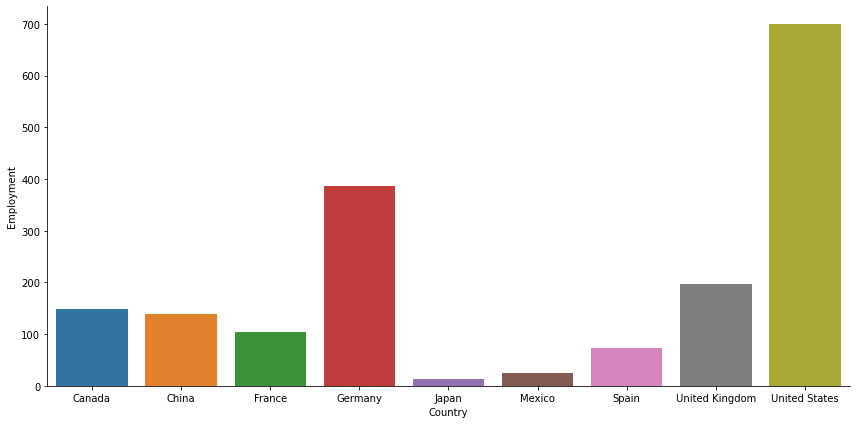

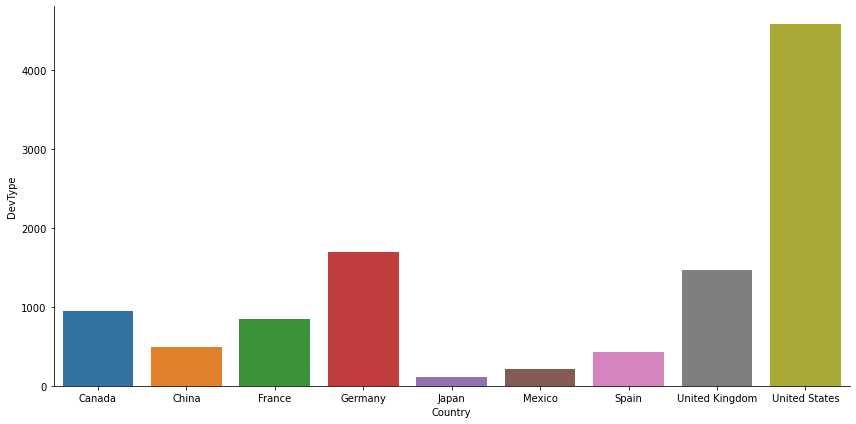

In [24]:
A=sns.catplot(
    data=missingData, kind="bar",
    x="Country", y="Employment",
    height = 6, aspect = 2)
B=sns.catplot(
    data=missingData, kind="bar",
    x="Country", y="DevType",
    height = 6, aspect = 2)

Trough this graphs we can conclude the countries with more missing data is United States and Gernmany. 
Also, put inot use our domanain we assume they have that amount of missing data due to their country size.
Therefore, we conclude this data can be considered as MCAR, Missing Comnpletly At Random, allowing us to drop those
rows with misisng data.
We will use the method .dropna(subset['columns'], inplace =True, how = 'any)

In [30]:
df.dropna(subset=['Employment', 'DevType'], 
          inplace= True, 
          how= 'any')

Now you can analyze the distribution of employment and developer types by country. You decide to aggregate the employment data by key developer roles that align with major parts of the development lifecycle:

Front-end

Back-end

Full-stack

Mobile development

Administration roles


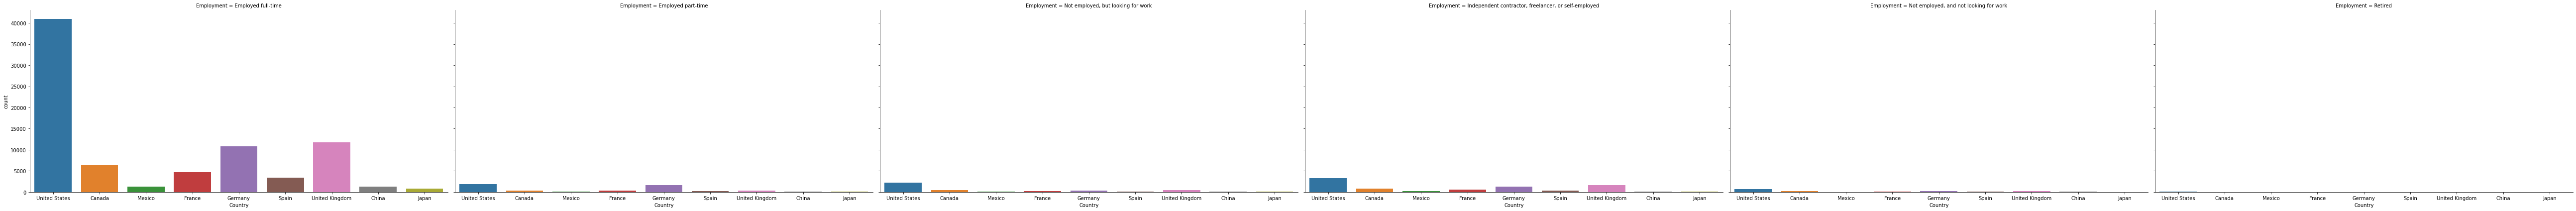

In [33]:
empfig = sns.catplot(x="Country", col="Employment",
                data=df, kind="count",
                height=6, aspect=2); #Graph shows the relation between employment and countries


/Users/luizotaviofariavitor/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/luizotaviofariavitor/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


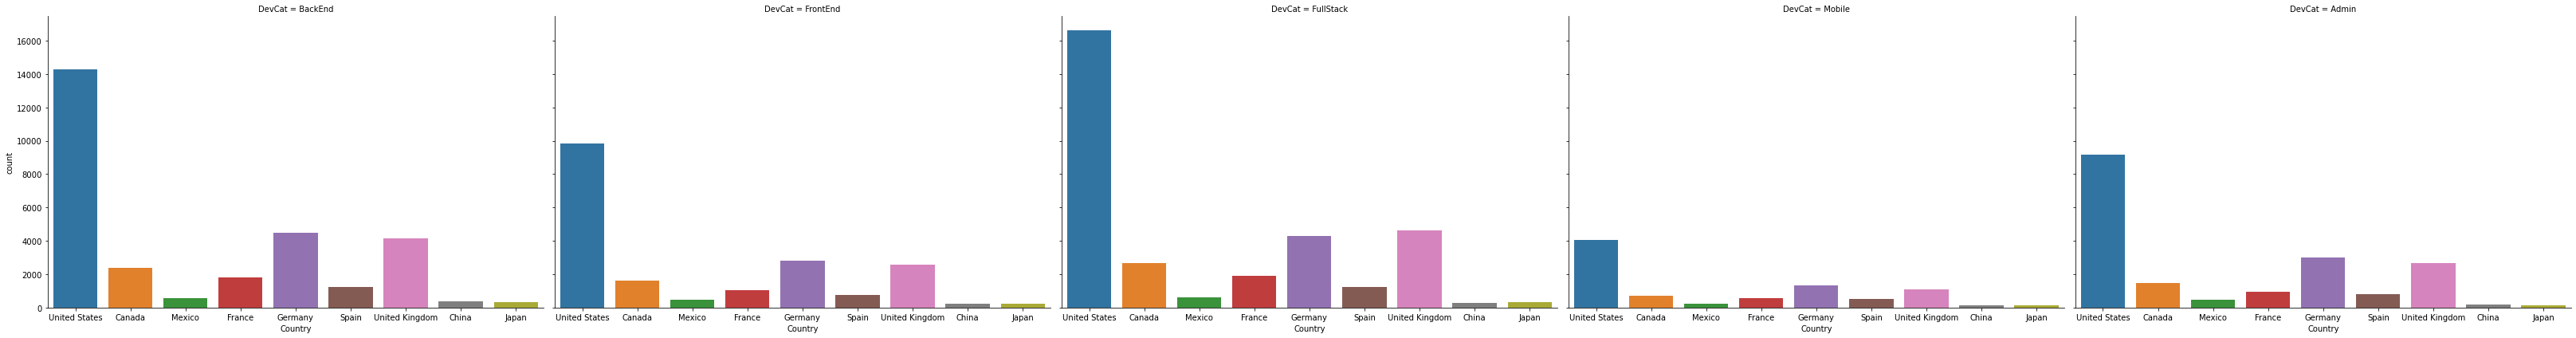

In [39]:
# Focus on a few of the key developer types outlined in the Stack Overflow survey
devdf = df[['Country','DevType']]
devdf.loc[devdf['DevType'].str.contains('back-end'), 'BackEnd'] = True
devdf.loc[devdf['DevType'].str.contains('front-end'), 'FrontEnd'] = True
devdf.loc[devdf['DevType'].str.contains('full-stack'), 'FullStack'] = True
devdf.loc[devdf['DevType'].str.contains('mobile'), 'Mobile'] = True
devdf.loc[devdf['DevType'].str.contains('administrator'), 'Admin'] = True

devdf = devdf.melt(id_vars=['Country'], 
    value_vars=['BackEnd','FrontEnd','FullStack','Mobile','Admin'], 
    var_name='DevCat',
    value_name='DevFlag')

devdf.dropna(how='any', inplace=True) #Delete any collumn that has a missing data
 
devFig = sns.catplot(x="Country", col="DevCat",
                data=devdf, kind="count",
                height=6, aspect=1.5);
 

You see that the vast majority of respondents are employed full-time. Since these developers are mainly employed, this data will be relevant for a client who wants to see what developers look for in a potential job. You also see that the majority of developers will have skill sets in front-end, back-end, or full-stack development. This is interesting, and shows that the market values developers who can excel in at least a major part of the development lifecycle, if not the entire stack.

#### Investigate developer undergraduate majors

You decide to dive into the background for each type of developer to see trends in their educational experience that ultimately led to a career with technology. In particular, you look at the overall trend of majors year over year for respondents. As you saw before, you are missing about 11% of the data for UndergradMajor. Why do you think this data is missing? Could something have happened over the course of these three years? Is the fact that data is missing accurate?

In [45]:
missingUndergrad = df[['UndergradMajor']].isnull().groupby(df['Year']).sum().reset_index()
missingUndergrad

,Year,UndergradMajor
0,2018,5559
1,2019,3831
2,2020,0


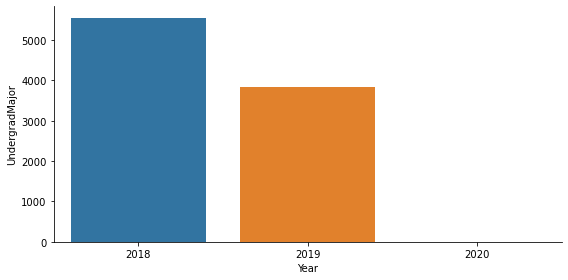

In [46]:
UndergradYear = sns.catplot(
                data = missingUndergrad, kind = 'bar',
                x= 'Year', y= 'UndergradMajor',
                height = 4, aspect =2)

Through the graph we notice all participants on the year of 2020 had filled in 
their Undergrad Major on the survey.
But what happened on the years of 2018, 2019? Were they transfering majors, not sure what major or career 
they wanted to follow?
or the purposes of your analysis, you are most interested in what major a person ultimately landed on, 
as this would be the educational background they would carry into a job search. You want to carry that 
value backwards for each participant to fill in any missing data. This is a great use for one of our 
Single Imputation techniques: NOCB! Fill in the gaps using NOCB:
Next Observation Carried Backward

In [52]:
# Sort by ID and Year so that each person's data is carried backwards correctly
df = df.sort_values(['RespondentID','Year'])
df['UndergradMajor'].bfill(axis=0, inplace= True)

From here, you analyze the major distribution for each year, using a vertical bar chart visualization:

/Users/luizotaviofariavitor/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/Users/luizotaviofariavitor/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/luizotaviofariavitor/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

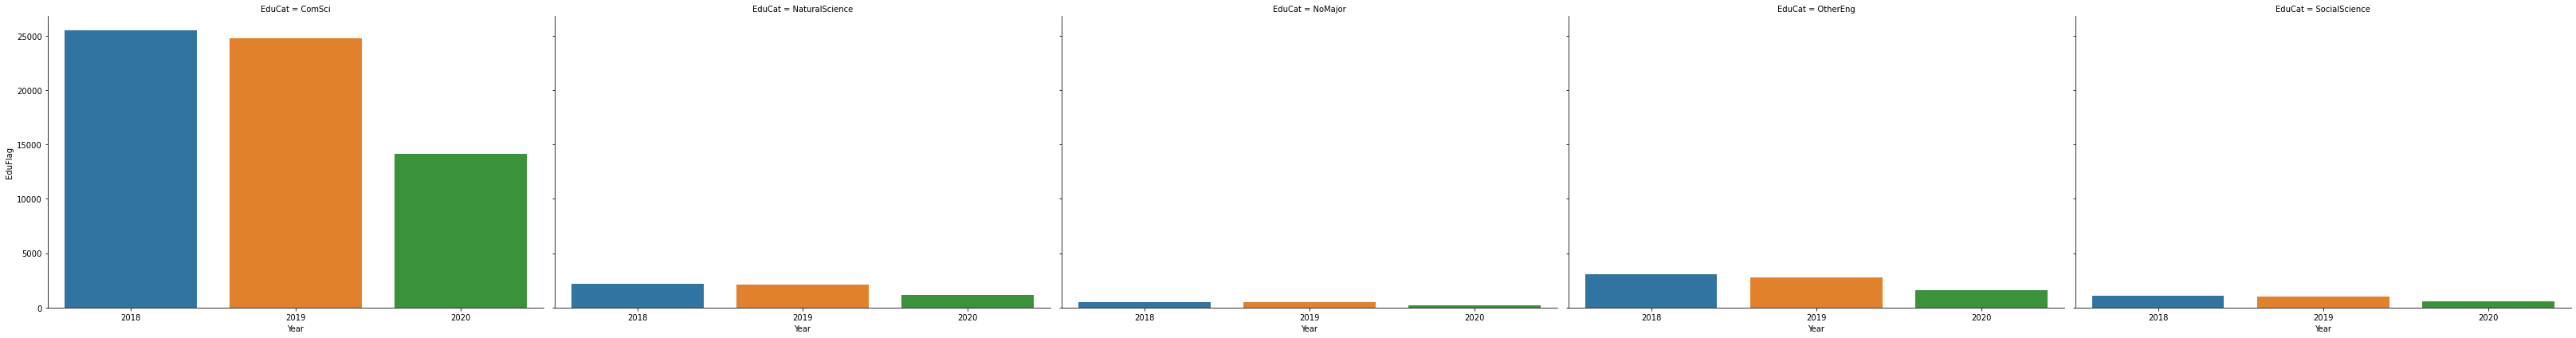

In [58]:
# Key major groups outlined in the Stack Overflow survey
majors = ['social science','natural science','computer science','development','another engineering','never declared']

edudf= df[['Year', 'UndergradMajor']]
edudf.dropna(how= 'any', inplace = True)

edudf.loc[edudf['UndergradMajor'].str.contains('(?i)social science'), 'SocialScience'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)natural science'), 'NaturalScience'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)computer science'), 'ComSci'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)development'), 'ComSci'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)another engineering'), 'OtherEng'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)never declared'), 'NoMajor'] = True
 
edudf = edudf.melt(id_vars=['Year'], 
    value_vars=['SocialScience','NaturalScience','ComSci','OtherEng','NoMajor'], 
    var_name='EduCat',
    value_name='EduFlag')

edudf.dropna(how='any', inplace=True)
edudf = edudf.groupby(['Year','EduCat']).count().reset_index()
 
eduFig = sns.catplot(x="Year", y='EduFlag', col="EduCat",
                data=edudf, kind="bar",
                height=6, aspect=1.5);

You notice that the vast majority of people who enter the workforce for development have some background in a Computer Science major. Interestingly, however, the number of Computer Science majors significantly declined over the years surveyed, indicating that there could be other majors that have successfully entered the workforce for their desired job. This would require further analysis and could allow an individual to pursue a separate education path and still end up in some kind of developer role.

#### Examine the relationship between years of experience and compensation

#### At this point, we have studied the demographics of developers around the world, from where they live to the education paths they have taken. Now, you turn your focus to the various aspects that would influence the job-hunting process.

Years of experience are an important metric when looking to understand the general skill and technical capabilities of a potential candidate. Compensation is also important for our client to understand what the “going rate” for a particular developer is in today’s market. I might assume that there is a strong correlation between experience and job compensation, making it an excellent hypothesis to explore.

In order to understand a bit about the data for each of these two fields, lets's perform some more exploratory analysis:

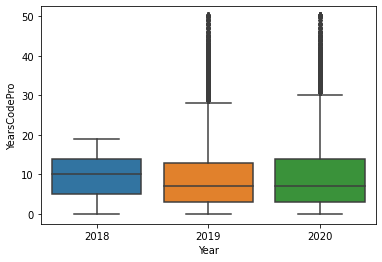

In [64]:
compFields= df[['Year','YearsCodePro', 'ConvertedComp']]

F = sns.boxplot (x ='Year', y= 'YearsCodePro', data =compFields)


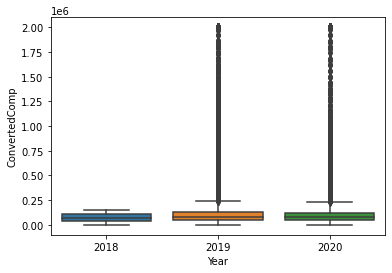

In [66]:
G= sns.boxplot( x='Year', y = 'ConvertedComp', data= compFields)

Although there are some outlier data points for each column, the overall distribution is fairly consistent year-over-year. This indicates that there is a strong correlation between the data points, which should tell a good story about how experience can translate into compensation. Since there is a clear trend with the data points, you decide the best method for filling in the missing data for these two columns is through Multiple Imputation:
That means we would have to create a model for the data.

In [68]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
 
imputedf = df[['YearsCodePro','ConvertedComp']]

traindf, testdf = train_test_split(imputedf, train_size=0.1)
 
# Create the IterativeImputer model to predict missing values
imp = IterativeImputer(max_iter=20, random_state=0)
 
# Fit the model to the the test dataset
imp.fit(imputedf)
 
# Transform the model on the entire dataset
compdf = pd.DataFrame(np.round(imp.transform(imputedf),0), columns=['YearsCodePro','ConvertedComp'])

The above code will loop through (up to 20 times), and fill in the missing data based on the context provided by the other column. This should create data points that are indicative of the overall trend of the data. Now, you can analyze the relationship between YearsCodePro and CinvertedComp through the use of a boxplot like so:

/var/folders/wd/yrwwb58d3md992vn3zjmmj0r0000gn/T/ipykernel_57132/217461189.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compPlotdf['CodeYearBins'] = pd.qcut(compPlotdf['YearsCodePro'], q=5) #Group the year in bins of 5 in 5


<AxesSubplot:xlabel='CodeYearBins', ylabel='ConvertedComp'>

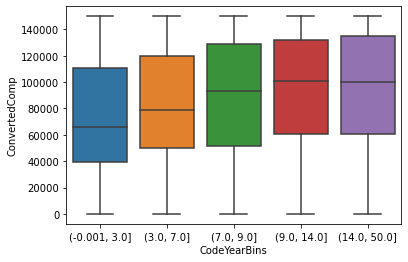

In [70]:
compPlotdf = compdf.loc[compdf['ConvertedComp'] <= 150000]
compPlotdf['CodeYearBins'] = pd.qcut(compPlotdf['YearsCodePro'], q=5) #Group the year in bins of 5 in 5
 
sns.boxplot(x="CodeYearBins", y="ConvertedComp",
            data=compPlotdf)

The plot above validates your hypothesis from before. While there are high (and low) earning developers at every experience level, experience appears to correlate with compensation. The more experienced a developer was, the more (on average) they were compensated.